# Learning to Manipulate under Limited Information - Graphs for Paper

In [105]:
from pref_voting.voting_methods import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

import pandas as pd
import seaborn as sns


# Setup

In [106]:
VISUALIZE_RESULTS = True
graphs_dir = 'graphs'

In [107]:
# fix an ordering of model sizes and voting methods for 
# the graphs

model_sizes_order = [
    "(4,)", 
    "(8,)", 
    "(16,)", 
    "(32,)", 
    "(64,)", 
    "(128,)", 
    "(256,)", 
    "(512,)",
    "(4, 4)", 
    "(8, 8)", 
    "(16, 8)", 
    "(16, 16)", 
    "(32, 32)", 
    "(64, 32)", 
    "(64, 64)", 
    "(128, 128)", 
    "(256, 128)", 
    "(256, 256)",
    "(8, 8, 8)", 
    "(32, 16, 8)", 
    "(32, 32, 32)", 
    "(64, 64, 64)", 
    "(128, 64, 32)", 
    "(128, 128, 128)", 
    "(256, 256, 256)", 
    "(512, 256, 128)"
]

voting_methods_order = [
    'Plurality', 
    'Borda', 
    #'Instant Runoff', 
    'Instant Runoff PUT',
    'Blacks'
    'Minimax', 
    'Strict Nanson', 
    'Split Cycle', 
    'Stable Voting',
    ]


In [108]:
# Color palettes

colors_for_bars = {
        "blue": "blue",
        "green": "green",
        "orange": "orange",
        "red": "red",
        "yellow": "yellow",
        "purple": "purple",
        "brown": "brown",
        "lightbrown": "#D2B48C",
        "darkbrown": "#8B4513"
    }

colorblind = {
        "blue": "#0400fb", #"#4171ff",
        "green": "#20ebff",
        "orange": "#ffc200",
        "red": "#c61c00",
    }

pastel={
        "blue": "#a1c9f4",
        "green": "#8de0a1",
        "orange": "#ffb482",
        "red": "#f768a1",
        "purple": "#d0bbff",
        "brown": "#debb9b"
    }

dark = {
        "blue": "#001f3f",
        "green": "#3f9b0b",
        "orange": "#ff851b",
        "red": "#ff4136",
        "purple": "#a23582",
        "brown": "#8B4513",
    }

muted = {
        "blue": "#4878d0",
        "green": "#6acc64",
        "orange": "#d65f5f",
        "red": "#d5bb67",
    }


# Figure 1

In [109]:
probmodel = 'uniform'  

voting_methods_order = [
    "Plurality",
    "Borda",
    #"Instant Runoff",
    "Instant Runoff PUT",
    "Blacks",
    "Minimax",
    "Strict Nanson",
    "Split Cycle",
    "Stable Voting",
]
if VISUALIZE_RESULTS: 

    gen = 1
    all_num_cands = [3, 4, 5, 6]
    all_num_voters = [5, 6, 10, 11, 20, 21]
    manip_weight = 1

    all_agent_infos = [
        'plurality_scores',
        'plurality_ranking',
        'majority',
        'margin',
        'sincere_winners',
        'qual_margin']

    labeling = 'optimize'
    decision_rule = 'argmax'
    metric_op = 'normalized_subtract'
    evaluation_batch_size = 4096
    max_est_std_error = 0.0005
    df = pd.read_csv(f"./evaluation_csv/{probmodel}/all_agent_infos_diff_cands.csv")

In [110]:
data_for_df = {
    "num_cands": list(),
    "num_voters": list(),
    "agent_infos": list(),
    "vm": list(),
    "mean_profitability": list(),
    "model_size": list(),
}

for num_cands in all_num_cands: 
    for num_voters in all_num_voters: 
        for vm in voting_methods_order: 
            for agent_infos in all_agent_infos:
                data_for_df["num_cands"].append(num_cands)
                data_for_df["num_voters"].append(num_voters)
                data_for_df["agent_infos"].append(agent_infos)
                data_for_df["vm"].append(vm)

                max_mean_profitability = df[(df['num_cands'] == num_cands) & (df['num_voters'] == num_voters) & (df['agent_infos'] == agent_infos) & (df['vm'] == vm)]['mean_profitability'].max()

                # find the model_size with the max mean_profitability
                model_size = df[(df['num_cands'] == num_cands) & (df['num_voters'] == num_voters) & (df['agent_infos'] == agent_infos) & (df['vm'] == vm) & (df['mean_profitability'] == max_mean_profitability)]['model_size'].values[0]

                data_for_df["mean_profitability"].append(max_mean_profitability)
                data_for_df["model_size"].append(model_size)
   
df_with_max = pd.DataFrame(data_for_df)


In [111]:
if VISUALIZE_RESULTS:

    # replace "Strict Nanson" with "Nanson" in the dataframe
    df_with_max['vm'] = df_with_max['vm'].replace('Strict Nanson', 'Nanson')
    df_with_max['vm'] = df_with_max['vm'].replace('Blacks', "Black's")

    filtered_df_all_agents = df_with_max[(df_with_max['num_cands'].isin(all_num_cands))]

    filtered_df_voters_all_agents = filtered_df_all_agents[filtered_df_all_agents['num_voters'].isin(all_num_voters)]

    grouped_df_all_agents = filtered_df_voters_all_agents.groupby(['vm', 'agent_infos']).mean_profitability.mean().unstack()

    specified_order = [ 
        "plurality_ranking", 
        "plurality_scores", 
        "majority", 
        "qual_margin", 
        "margin", 
        "sincere_winners"]
    grouped_df_ordered = grouped_df_all_agents[specified_order]


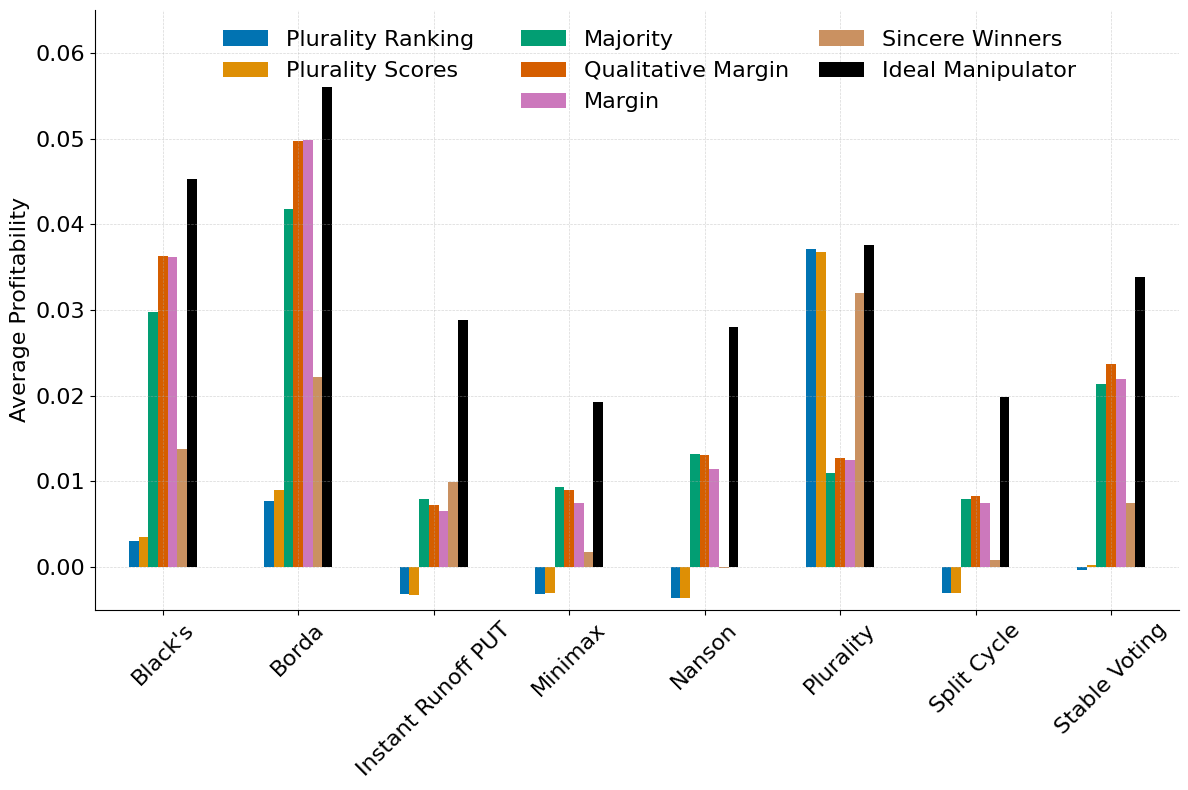

In [112]:
if VISUALIZE_RESULTS:
    # Load the two CSV files
    file_path_1 = f'./ideal_manipulator_data/{probmodel}/combined_ideal_manipulator_data.csv'
    df1 = pd.read_csv(file_path_1)
    
    fontsize = 16

    # Combining the two dataframes
    combined_df = df1
    combined_df['vm'] = combined_df['vm'].replace('Strict Nanson', 'Nanson')
    combined_df['vm'] = combined_df['vm'].replace('Blacks', "Black's")

    # Filtering for 'max' decision_rule
    filtered_max_decision = combined_df[combined_df['decision_rule'] == 'max']

    # Grouping by voting method and calculating the average of 'mean' for 3 and 6 candidates and 10 and 11 voters
    average_means = filtered_max_decision.groupby('vm')['mean'].mean()

    # Adding the 'ideal manipulator' data to the previous bar graph data
    updated_grouped_df = grouped_df_ordered.assign(Ideal_Manipulator=average_means)
    updated_grouped_df = updated_grouped_df.fillna(0)  # Fill NaNs with 0 for plotting

    specified_order = [ 
        "plurality_ranking",
        "plurality_scores", 
        "majority", 
        "qual_margin", 
        "margin", 
        "sincere_winners", 
        "Ideal_Manipulator"]
    
    updated_grouped_df = updated_grouped_df[specified_order]

    colors=sns.color_palette("colorblind", len(updated_grouped_df.columns)-1) + ["black"]

    fig, ax = plt.subplots(figsize=(12, 8))
    updated_grouped_df.plot(kind='bar', 
                            ax=ax,
                            color=colors)


    ax.set_xlabel("")
    ax.set_ylabel("Average Profitability", fontsize=fontsize)
    ax.set_title("", fontsize=fontsize)

    # Updating the legend with readable labels
    readable_legend_labels = {
        "plurality_ranking": "Plurality Ranking",
        "plurality_scores": "Plurality Scores",
        "majority": "Majority",
        "qual_margin": "Qualitative Margin",
        "margin": "Margin",
        "sincere_winners": "Sincere Winners",
        "Ideal_Manipulator": "Ideal Manipulator"
    }

    handles, labels = ax.get_legend_handles_labels()
    handles = handles[1:] + handles[0:1]
    labels = labels[1:] + labels[0:1]

    new_labels = [readable_legend_labels.get(label, label) for label in labels]

    handles, labels = ax.get_legend_handles_labels()

    # Divide handles and labels into three groups
    handles_col1 = handles[:2]  
    labels_col1 = labels[:2]
    new_labels_col1 = [readable_legend_labels.get(label, label) for label in labels_col1]  
    
    handles_col2 = handles[2:5]  
    labels_col2 = labels[2:5]
    new_labels_col2 = [readable_legend_labels.get(label, label) for label in labels_col2]  

    handles_col3 = handles[5:7]  
    labels_col3 = labels[5:7]
    new_labels_col3 = [readable_legend_labels.get(label, label) for label in labels_col3]  

    leg_col1 = ax.legend(handles_col1, new_labels_col1, loc='upper left', bbox_to_anchor=(0.1, 1), ncol=1, frameon=False, fontsize=fontsize)

    leg_col2 = ax.legend(handles_col2, new_labels_col2, loc='upper left', bbox_to_anchor=(0.375, 1), ncol=1, frameon=False, fontsize=fontsize)

    leg_col3 = ax.legend(handles_col3, new_labels_col3, loc='upper left', bbox_to_anchor=(0.65, 1), ncol=1, frameon=False, fontsize=fontsize)

    # Add the legends back to the Axes
    ax.add_artist(leg_col1)
    ax.add_artist(leg_col2)


    plt.yticks(fontsize=fontsize)

    plt.xticks(rotation=45, fontsize=fontsize)
    sns.despine(right=True, top=True)
    # add grid lines
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.ylim(-0.005, 0.065)
    plt.tight_layout()
    plt.savefig(f"./{graphs_dir}/{probmodel}_voting_methods_different_agent_infos.pdf")
    plt.show()


### Ratio of mean profitability to the mean of the best possible profitability for a fixed model size

In [113]:
if VISUALIZE_RESULTS:
    # Copy the original dataframe
    df_ratio = updated_grouped_df.copy()

    # Applying the ratio transformation to each column except 'vm' and 'Ideal_Manipulator'
    for column in df_ratio.columns:
        if column != 'vm' and column != 'Ideal_Manipulator':
            df_ratio[column] = updated_grouped_df[column] / updated_grouped_df['Ideal_Manipulator']
    df_ratio

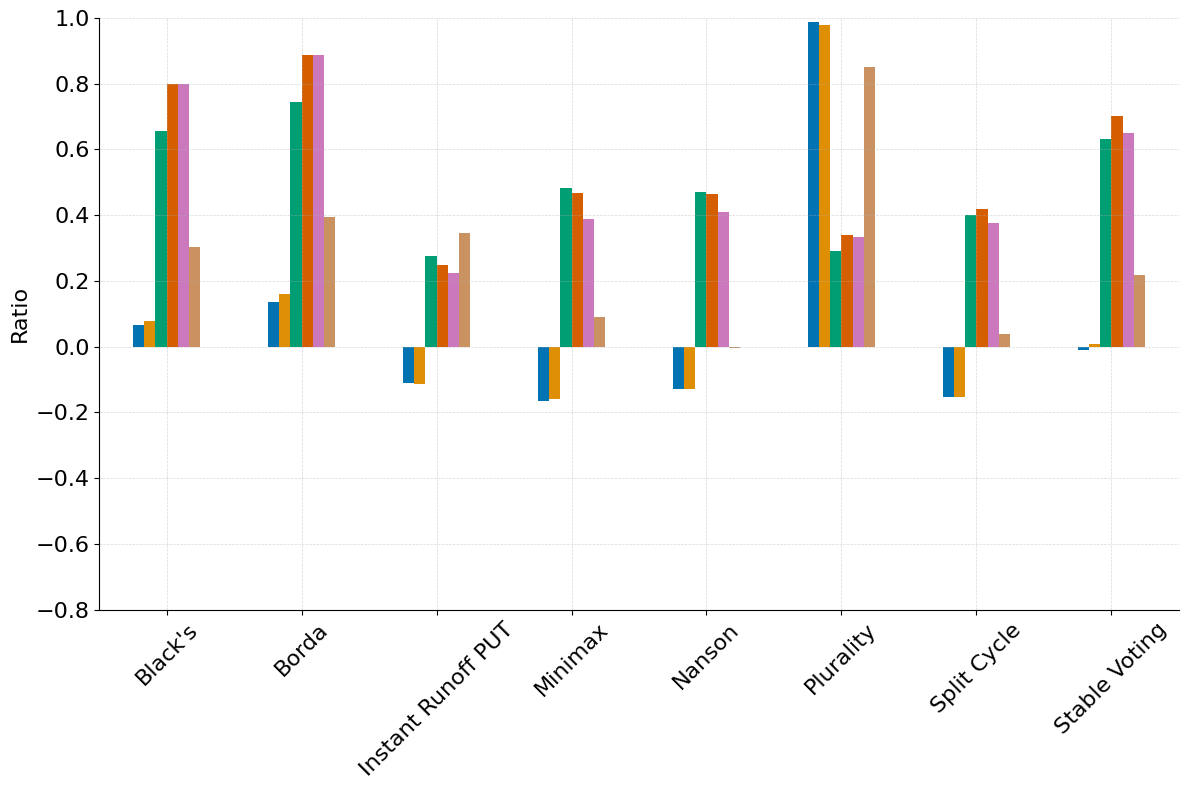

In [114]:
if VISUALIZE_RESULTS:
    # Reordering the columns in the dataframe to match the specified order
    specified_order = [ 
        "plurality_ranking", 
        "plurality_scores", 
        "majority", 
        "qual_margin", 
        "margin", 
        "sincere_winners"
        ]
    ratio_df_ordered = df_ratio[specified_order]

    colors=sns.color_palette("colorblind", len(updated_grouped_df.columns)-1) + ["black"]

    #plt.style.use('seaborn-colorblind')
    fig, ax = plt.subplots(figsize=(12, 8))
    ratio_df_ordered.plot(kind='bar', ax=ax, color=colors)

    ax.set_xlabel("")
    ax.set_ylabel("Ratio",fontsize=fontsize)
    ax.set_title("",fontsize=fontsize)

    readable_legend_labels = {
        "plurality_ranking": "Plurality Ranking",
        "plurality_scores": "Plurality Scores",
        "majority": "Majority",
        "qual_margin": "Qualitative Margin",
        "margin": "Margin",
        "sincere_winners": "Sincere Winners",
        "Ideal_Manipulator": "Ideal Manipulator"
    }

    ax.get_legend().remove()

    plt.ylim(-0.8, 1.0)
    plt.yticks(fontsize=fontsize)
    plt.xticks(rotation=45, fontsize=fontsize)
    sns.despine(right=True, top=True)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.savefig(f"./{graphs_dir}/ratio_{probmodel}_voting_methods_different_agent_infos.pdf")
    plt.show()


# Supplementary Figures A.1-A.3, B.1-B.3: Comparing MLPs of different sizes for different voting methods.

In [126]:
# read in the evaluation data

if VISUALIZE_RESULTS: 
    gen = 1
    num_cands = 6
    num_voters1 = 10
    num_voters2 = 11
    manip_weight = 1

    agent_infos1 = 'plurality_scores'
    agent_infos1_str = 'plurality scores'  
    agent_infos2 = 'majority'
    agent_infos2_str = 'majority matrix'
    additional_title_str = "Plurality Scores vs. Majority Matrix"
    probmodel = 'uniform'
    group_by_num_voters = False # if True, the bars for even number voters are next to each other (similarly for odd number of voters).
    
    voting_methods_order = [
        'Plurality', 
        'Borda', 
        #'Instant Runoff', 
        'Instant Runoff PUT',
        'Blacks',
        'Minimax', 
        'Strict Nanson', 
        'Split Cycle', 
        'Stable Voting',
        ]

    num_voters1_colors = {
        agent_infos1: colorblind["blue"], 
        agent_infos2: colorblind["red"]
    }
    num_voters2_colors = {
        agent_infos1: colorblind["green"], 
        agent_infos2: colorblind["orange"]
    }

    labeling = 'optimize'
    decision_rule = 'argmax'
    metric_op = 'normalized_subtract'
    evaluation_batch_size = 4096
    max_est_std_error = 0.0005



In [127]:

def model_size_to_tuple(model_size):
    # helper function for displaying the model sizes in the correct order on the x-axis

    tuple_elements = model_size.strip().replace('(', '').replace(')', '').split(',')
    tuple_elements = [element.strip() for element in tuple_elements]
    if '' in tuple_elements:
        return (0, 0)
    num_layers = len(tuple_elements)
    total_size = sum(map(int, tuple_elements))
    return (num_layers, total_size)

def generate_avg_df(
        df, 
        num_cands, 
        num_voters,  
        agent_infos, 
        manip_weight, 
        labeling, 
        probmodel):
    
    # generate the dataframe to for the graphs
    # Note: In the current version, this function is always called for a fixed number of candidates, number of voters, and a generation, so there is a single mean_profitability for each model_size
    df = df[((df['agent_infos'] == agent_infos[0]) & (df['manip_weight'] == manip_weight)) & ((df['labeling'] == labeling) & (df['probmodel'] == probmodel))]

    df['model_size'] = df['model_size'].astype(str)

    df_avg_mean_profitability = df.groupby(['vm', 'model_size', 'labeling', 'est_std_error', 'generation'])['mean_profitability'].mean().reset_index()
    df_avg_mean_profitability['num_cands'] = num_cands
    df_avg_mean_profitability['num_voters'] = num_voters
    df_avg_mean_profitability['model_size_tuple'] = df_avg_mean_profitability['model_size'].apply(model_size_to_tuple)

    df_avg_mean_profitability = df_avg_mean_profitability.sort_values(by='model_size_tuple')

    df_avg_mean_profitability.rename(columns={'mean_profitability': 'average_mean_profitability'}, inplace=True)

    return df_avg_mean_profitability

In [128]:

if VISUALIZE_RESULTS:
    # create the appropriate dataframes
    df = pd.read_csv(f"evaluation_csv/{probmodel}/all_agent_infos_diff_cands.csv")

    df_agent_infos1 = df[df['agent_infos'] == agent_infos1]
    df_agent_infos2 = df[df['agent_infos'] == agent_infos2]    
    dfs = {
        (agent_infos1,): df_agent_infos1,
        (agent_infos2,): df_agent_infos2,
    }

    agent_infos_list = [[agent_infos1], [agent_infos2] ]

    for agent_infos in agent_infos_list:
                    
        df = dfs[tuple(agent_infos)]
        df_avg_1 = generate_avg_df(
            df[(df["num_cands"] == num_cands) & (df["num_voters"]==num_voters1)], 
            num_cands, 
            num_voters1,  
            tuple(agent_infos), 
            manip_weight, 
            labeling, 
            probmodel)
        df_avg_2 = generate_avg_df(
            df[(df["num_cands"] == num_cands) & (df["num_voters"]==num_voters2)], 
            num_cands, 
            num_voters2,  
            tuple(agent_infos), 
            manip_weight, 
            labeling, 
            probmodel)
                    
        df_avg = pd.concat([df_avg_1, df_avg_2])
        print("generated ", f"evaluation_csv/{probmodel}/df_avg_{num_cands}_{agent_infos}_{manip_weight}_{gen}.csv")

        df_avg.to_csv(f"evaluation_csv/{probmodel}/df_avg_{num_cands}_{agent_infos}_{manip_weight}_{gen}.csv")

generated  evaluation_csv/uniform/df_avg_6_['plurality_scores']_1_1.csv
generated  evaluation_csv/uniform/df_avg_6_['majority']_1_1.csv


In [129]:
def generate_graphs_with_errorbars(df, ideal_manipulators_df, num_cands, manip_weight, legend_label_mapping, color_dict, filename, labeling='satisfice', probmodel='uniform', gen=1, additional_title_str=''):
    # function to generate the graphs for Figures 1 and 2
    # multiply all est_std_errors by 2 to get 95% confidence intervals
    df['est_std_error'] = df['est_std_error'] * 2
    ideal_manipulators_df['est_std_error'] = ideal_manipulators_df['est_std_error'] * 2

    fontsize=16
    df = df[df['labeling'] == labeling]
    y_ticks = list(np.arange(-0.08, 0.10, 0.01))
    df = df[df['model_size'].isin(model_sizes_order)]
    df['model_size'] = pd.Categorical(df['model_size'], categories=model_sizes_order, ordered=True)
    df.sort_values('model_size', inplace=True)
    
    fig = plt.figure(figsize=(24, 33))
    gs = fig.add_gridspec(len(voting_methods_order) // 2, 2, hspace=0.1, wspace=0.05)
    
    voters_order = list(legend_label_mapping.keys())
    bar_offset = [-0.38, -0.125, 0.125, 0.38]
    
    # Reordered criteria for ideal manipulators
    ideal_criteria = [(num_voters1, 'max'), (num_voters2, 'max')]
    
    # New colors for ideal manipulator bars
    ideal_colors = ['#9370DB', '#4B0082', '#808080', '#404040']
    ideal_legend_labels = [f'{num_voters1}', f'{num_voters2}']
    
    # Adjusted vertical line positions
    vline_positions = [model_sizes_order.index("(512,)"), model_sizes_order.index("(256, 256)"), model_sizes_order.index("(512, 256, 128)")]
    
    # Ideal voter bar offsets adjusted to place x-tick in the center
    ideal_voter_bar_offsets = [-0.125, 0.125]
    
    for i, voting_method in enumerate(voting_methods_order):
        ax = fig.add_subplot(gs[i // 2, i % 2])
        df_filtered_vm = df[df['vm'] == voting_method]
        
        # Existing bars
        for idx, voter_info in enumerate(voters_order):
            current_data = df_filtered_vm[df_filtered_vm['voters_info'] == voter_info]
            ax.bar(x=np.arange(len(model_sizes_order)) + bar_offset[idx], height=current_data['average_mean_profitability'],
                   yerr=current_data['est_std_error'], width=0.25, align='center', label=legend_label_mapping[voter_info] if i == 0 else "", color=color_dict[voter_info])
        
        # Bars for ideal manipulators using the reordered criteria and updated colors
        for idx, (num_voters, decision_rule) in enumerate(ideal_criteria):
            ideal_data = ideal_manipulators_df[(ideal_manipulators_df['vm'] == voting_method) & (ideal_manipulators_df['num_voters'] == num_voters) & (ideal_manipulators_df['decision_rule'] == decision_rule)]
            ax.bar(x=len(model_sizes_order) + ideal_voter_bar_offsets[idx], height=ideal_data['mean'].values[0], yerr=ideal_data['est_std_error'].values[0], width=0.25, align='center', color=ideal_colors[idx])
        
        # Drawing the vertical dashed lines
        for pos in vline_positions:
            ax.axvline(x=pos + 0.5, color='gray', linestyle='--', linewidth=1)
        
        voting_method = voting_method if (voting_method != 'Strict Nanson' and voting_method != "Blacks")  else 'Nanson' if voting_method == "Strict Nanson" else "Black's"
        # Other plotting settings remain the same
        ax.set_title(f'{voting_method}', fontsize=18, weight='bold')
        ax.tick_params(axis='x', rotation=90, labelsize=8 if i // 2 == (len(voting_methods_order) // 2 - 1) else 0)
        ax.tick_params(axis='y', labelsize=10 if i % 2 == 0 else 0)
        ax.set_yticks(y_ticks)
        ax.set_ylim([-0.09, 0.09])
        ax.set_yticklabels([round(y,2) for y in y_ticks] if i % 2 == 0 else [], fontsize=fontsize)
        ax.set_xticks(list(np.arange(len(model_sizes_order))) + [len(model_sizes_order)])
        ax.set_xticklabels(model_sizes_order + ['ideal manipulator'] if i // 2 == (len(voting_methods_order) // 2 - 1) else [], fontsize=fontsize)
        ax.set_ylabel('average profitability of submitted ranking' if i % 2 == 0 else '', fontsize=18)
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.grid(True, which='both',    linestyle='--', linewidth=0.5, alpha=0.5)
        
        if i == 0:
            # Main legend
            legend1 = ax.legend(loc='lower right', bbox_to_anchor=(0.725, 0), title="Voters, Manipulator Info", title_fontsize = 18, fontsize=fontsize)
            ax.add_artist(legend1)
            
            # Secondary legend for ideal manipulators with rectangles and labels
            handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in zip(ideal_colors, ideal_legend_labels)]
            ax.legend(handles=handles, loc='lower right', bbox_to_anchor=(1.0, 0), title="Ideal Manipulator", title_fontsize = 18, fontsize=fontsize)
    
    # move suptitle down

    to_probmodel_str = {
        'uniform': 'Uniform Utility Model',
        'mallows': 'Mallows Model',
        'spatial_2dim': 'Spatial 2D Model'
    }
    if additional_title_str == '':
        title_str = f'{to_probmodel_str[probmodel]}'
    else: 
        title_str = f'{to_probmodel_str[probmodel]}, {additional_title_str}'
    plt.suptitle(f'{title_str}', fontsize=24, y=0.857)
    plt.subplots_adjust(hspace=0.0, wspace=0.0, top=.83, bottom=0.15)
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_71061/1339673911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideal_manipulators_df['est_std_error'] = ideal_manipulators_df['est_std_error'] * 2
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_71061/1339673911.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


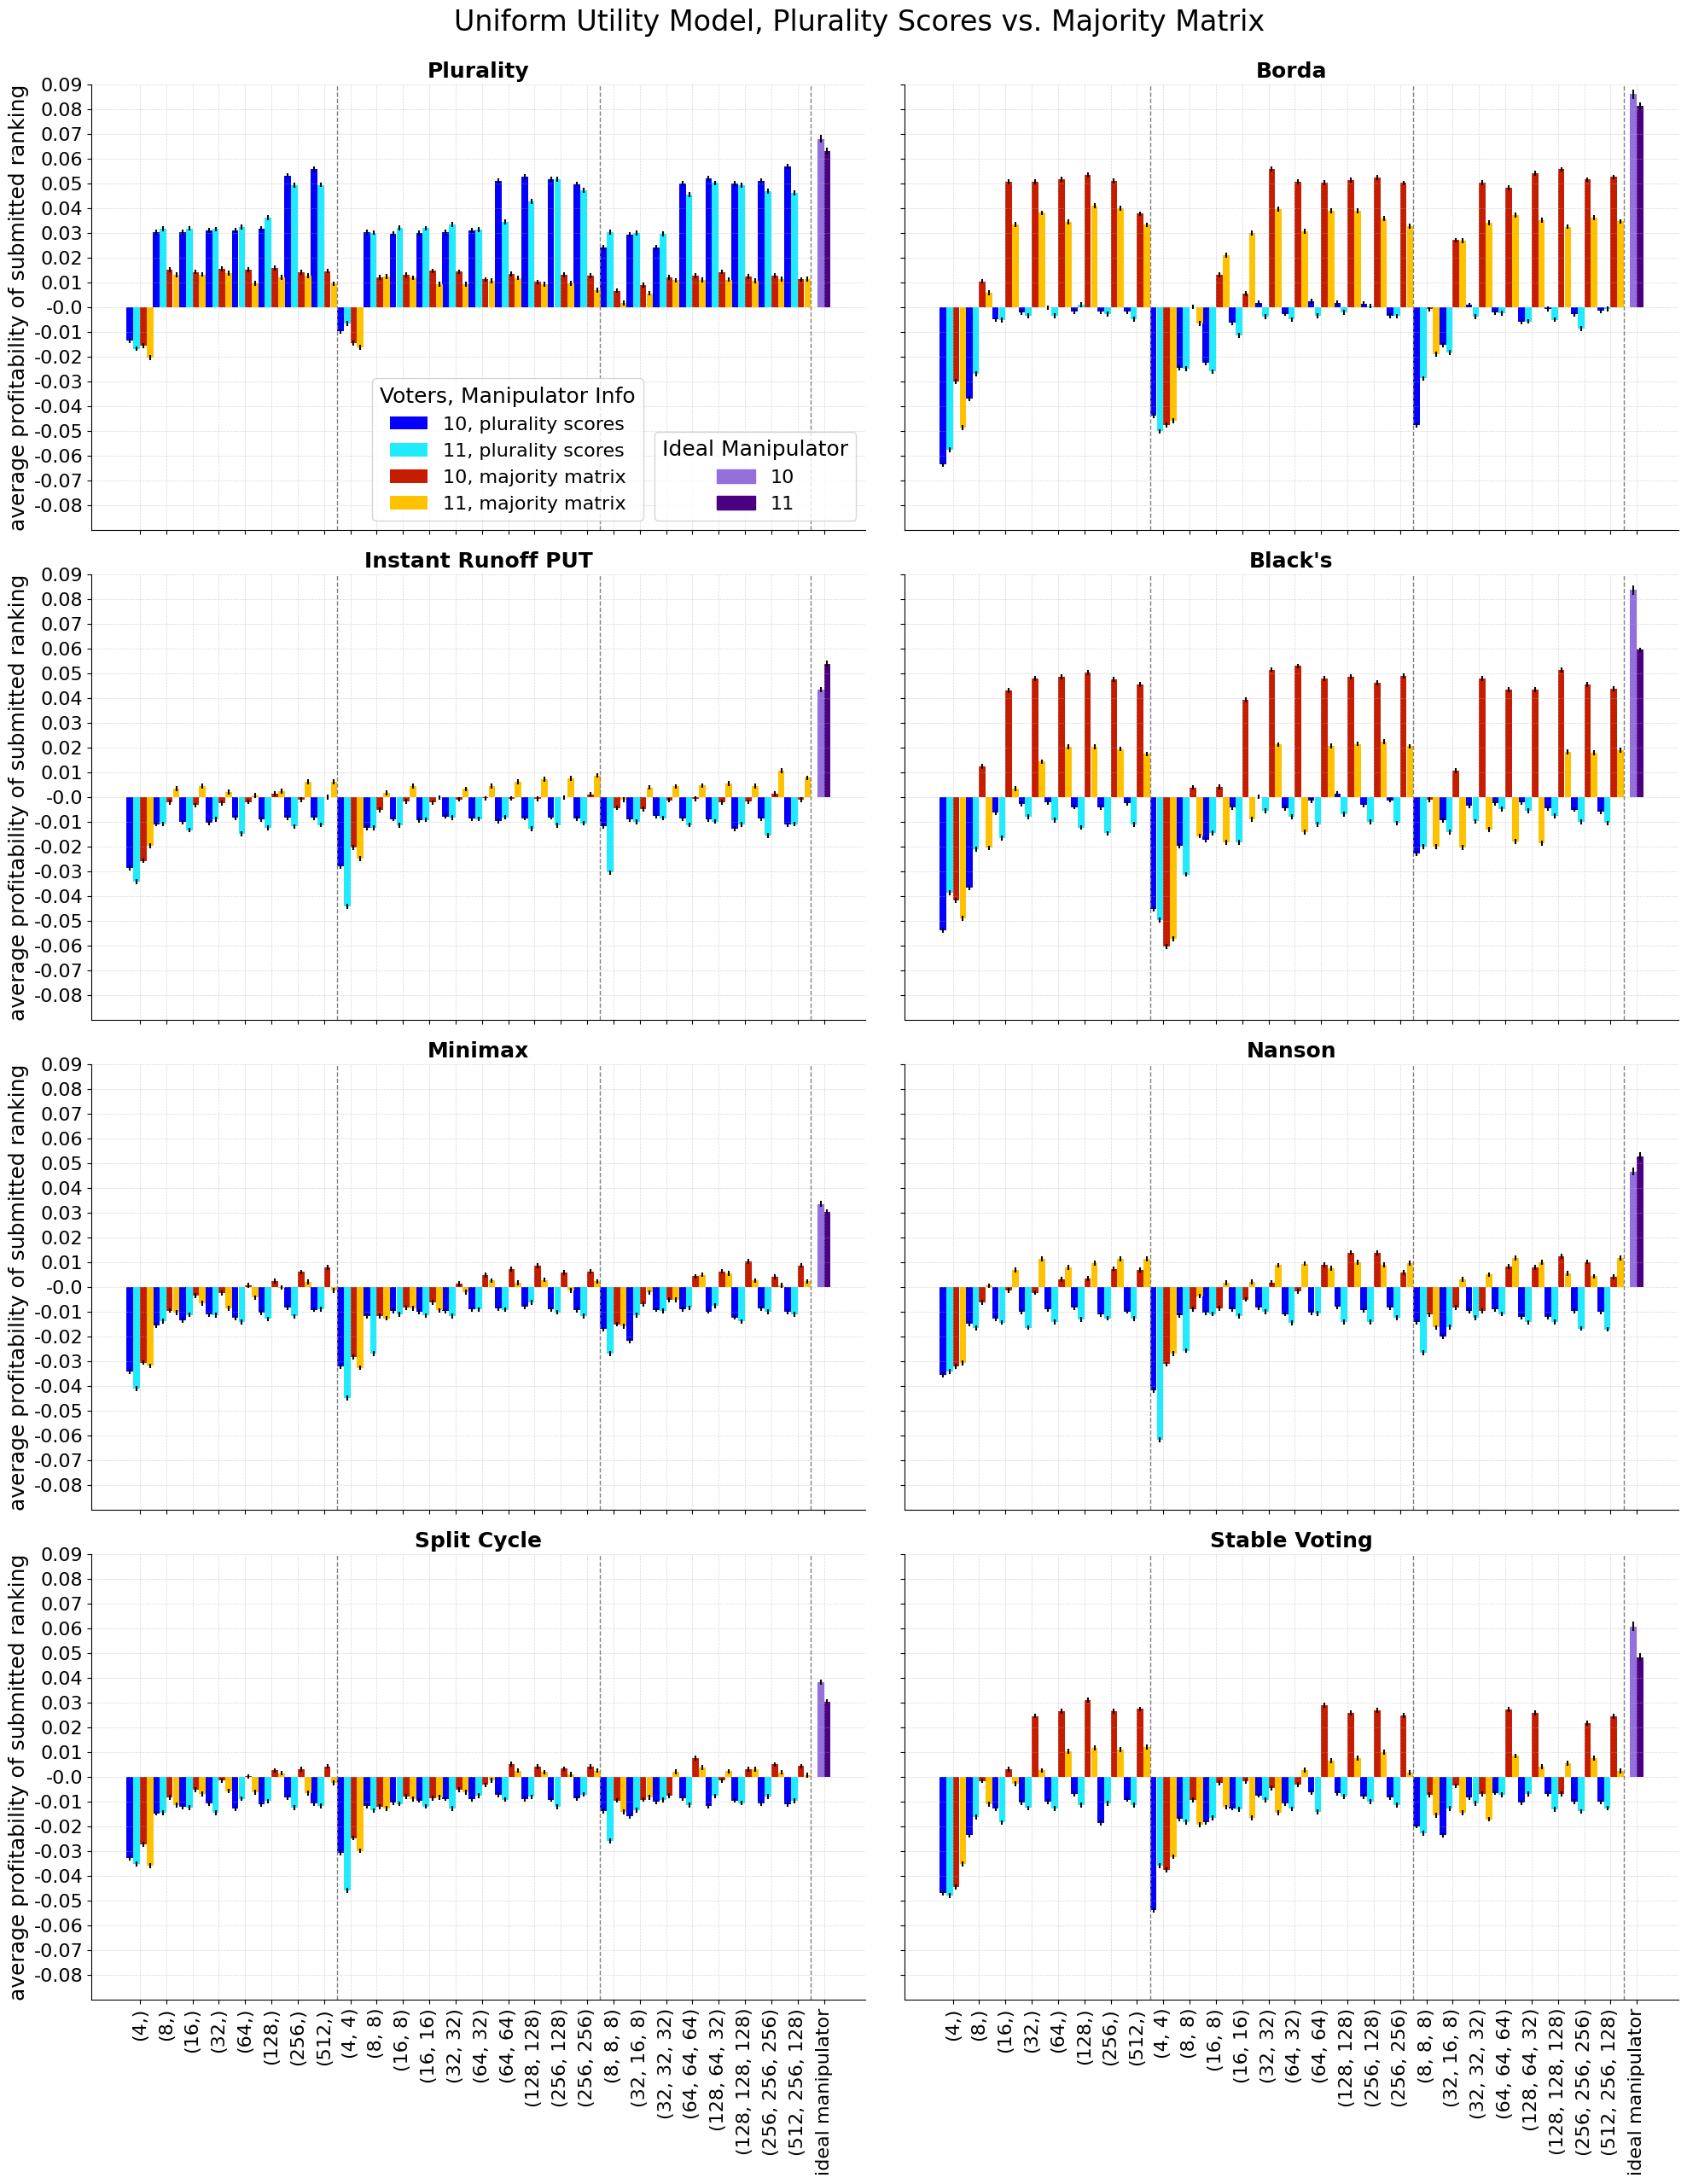

In [130]:
# generate the graphs

if VISUALIZE_RESULTS:
    filename = f"./{graphs_dir}/{probmodel}_graphs_{gen}_{num_cands}_{num_voters1, num_voters2}_{agent_infos1}_vs_{agent_infos2}_with_ideal.pdf"

    agent_infos = [agent_infos1]
    df_agent_infos1 = pd.read_csv(f"evaluation_csv/{probmodel}/df_avg_{num_cands}_{agent_infos}_{manip_weight}_{gen}.csv")

    agent_infos = [agent_infos2]
    df_agent_infos2 = pd.read_csv(f"evaluation_csv/{probmodel}/df_avg_{num_cands}_{agent_infos}_{manip_weight}_{gen}.csv")

    df_agent_infos1['agent_infos'] = agent_infos1
    df_agent_infos2['agent_infos'] = agent_infos2

    # Combining both dataframes again
    combined_df_new = pd.concat([df_agent_infos1, df_agent_infos2], ignore_index=True)

    # Creating the 'voters_info' column which combines the number of voters and agent_infos
    combined_df_new['voters_info'] = combined_df_new['num_voters'].astype(str) + ', ' + combined_df_new['agent_infos']

    color_dict = {
            f"{num_voters1}, {agent_infos1}": num_voters1_colors[agent_infos1],
            f"{num_voters2}, {agent_infos1}": num_voters2_colors[agent_infos1],
            f"{num_voters1}, {agent_infos2}": num_voters1_colors[agent_infos2],
            f"{num_voters2}, {agent_infos2}": num_voters2_colors[agent_infos2],
        }

    if group_by_num_voters:
        legend_label_mapping = {
                f"{num_voters1}, {agent_infos1}": f"{num_voters1}, {agent_infos1_str}",
                f"{num_voters1}, {agent_infos2}": f"{num_voters1}, {agent_infos2_str}",

                f"{num_voters2}, {agent_infos1}": f"{num_voters2}, {agent_infos1_str}",
                f"{num_voters2}, {agent_infos2}": f"{num_voters2}, {agent_infos2_str}"
            }
        
    else: 
        legend_label_mapping = {
                f"{num_voters1}, {agent_infos1}": f"{num_voters1}, {agent_infos1_str}",
                f"{num_voters2}, {agent_infos1}": f"{num_voters2}, {agent_infos1_str}",
                f"{num_voters1}, {agent_infos2}": f"{num_voters1}, {agent_infos2_str}",
                f"{num_voters2}, {agent_infos2}": f"{num_voters2}, {agent_infos2_str}"
            }



    ideal_manip_df = pd.read_csv(f'ideal_manipulator_data/{probmodel}/combined_ideal_manipulator_data.csv')

    ideal_manipulators_df = ideal_manip_df[ideal_manip_df['num_voters'].isin([num_voters1, num_voters2])]
    # Now calling the modified function with the provided arguments
    
    
    generate_graphs_with_errorbars(combined_df_new, ideal_manipulators_df[ideal_manipulators_df["num_cands"] == num_cands], num_cands, manip_weight, legend_label_mapping, color_dict, filename, labeling=labeling, probmodel=probmodel, gen=gen, additional_title_str=additional_title_str)


## Supplementary Figures C.1:  Instant Runoff vs. Instant Runoff PUT

In [131]:
if VISUALIZE_RESULTS: 
    gen = 1
    num_cands = 3
    num_voters1 = 10
    num_voters2 = 11
    manip_weight = 1

    agent_infos1 = 'plurality_ranking'
    agent_infos1_str = 'plurality ranking'  
    agent_infos2 = 'plurality_scores'
    agent_infos2_str = 'plurality scores'
    additional_title_str = "Plurality Ranking vs. Plurality Scores"
    probmodel = 'uniform'
    group_by_num_voters = True
    
    voting_methods_order = [
        'Plurality', 
        'Borda', 
        #'Instant Runoff', 
        'Instant Runoff PUT',
        'Blacks',
        'Minimax', 
        'Strict Nanson', 
        'Split Cycle', 
        'Stable Voting',
        ]

    num_voters1_colors = {
        agent_infos1: colorblind["blue"], 
        agent_infos2: colorblind["red"]
    }
    num_voters2_colors = {
        agent_infos1: colorblind["green"], 
        agent_infos2: colorblind["orange"]
    }

    labeling = 'optimize'
    decision_rule = 'argmax'
    metric_op = 'normalized_subtract'
    evaluation_batch_size = 4096
    max_est_std_error = 0.0005



In [132]:
def generate_avg_df(
        df, 
        num_cands, 
        num_voters,  
        agent_infos, 
        manip_weight, 
        labeling, 
        probmodel):
    
    # generate the dataframe to for the graphs
    # Note: In the current version, this function is always called for a fixed number of candidates, number of voters, and a generation, so there is a single mean_profitability for each model_size
    df = df[((df['agent_infos'] == agent_infos[0]) & (df['manip_weight'] == manip_weight)) & ((df['labeling'] == labeling) & (df['probmodel'] == probmodel))]

    df['model_size'] = df['model_size'].astype(str)

    df_avg_mean_profitability = df.groupby(['vm', 'model_size', 'labeling', 'est_std_error', 'generation'])['mean_profitability'].mean().reset_index()
    df_avg_mean_profitability['num_cands'] = num_cands
    df_avg_mean_profitability['num_voters'] = num_voters
    df_avg_mean_profitability['model_size_tuple'] = df_avg_mean_profitability['model_size'].apply(model_size_to_tuple)

    df_avg_mean_profitability = df_avg_mean_profitability.sort_values(by='model_size_tuple')

    df_avg_mean_profitability.rename(columns={'mean_profitability': 'average_mean_profitability'}, inplace=True)

    return df_avg_mean_profitability

In [133]:
if VISUALIZE_RESULTS:
    # create the appropriate dataframes
    df = pd.read_csv(f"evaluation_csv/{probmodel}/all_agent_infos_diff_cands.csv")

    df_agent_infos1 = df[df['agent_infos'] == agent_infos1]
    df_agent_infos2 = df[df['agent_infos'] == agent_infos2]    
    dfs = {
        (agent_infos1,): df_agent_infos1,
        (agent_infos2,): df_agent_infos2,
    }

    agent_infos_list = [[agent_infos1], [agent_infos2] ]

    for agent_infos in agent_infos_list:
                    
        df = dfs[tuple(agent_infos)]
        df_avg_1 = generate_avg_df(
            df[(df["num_cands"] == num_cands) & (df["num_voters"]==num_voters1)], 
            num_cands, 
            num_voters1,  
            tuple(agent_infos), 
            manip_weight, 
            labeling, 
            probmodel)
        df_avg_2 = generate_avg_df(
            df[(df["num_cands"] == num_cands) & (df["num_voters"]==num_voters2)], 
            num_cands, 
            num_voters2,  
            tuple(agent_infos), 
            manip_weight, 
            labeling, 
            probmodel)
                    
        df_avg = pd.concat([df_avg_1, df_avg_2])
        print("generated ", f"evaluation_csv/{probmodel}/df_avg_{num_cands}_{agent_infos}_{manip_weight}_{gen}.csv")

        df_avg.to_csv(f"evaluation_csv/{probmodel}/df_avg_{num_cands}_{agent_infos}_{manip_weight}_{gen}.csv")

generated  evaluation_csv/uniform/df_avg_3_['plurality_ranking']_1_1.csv
generated  evaluation_csv/uniform/df_avg_3_['plurality_scores']_1_1.csv


In [134]:
def generate_graphs_with_errorbars_two_vms(df, ideal_manipulators_df, num_cands, manip_weight, legend_label_mapping, color_dict, filename, voting_method1, voting_method2, labeling='satisfice', probmodel='uniform', gen=1, additional_title_str=''):
    # Multiply all est_std_errors by 2 to get 95% confidence intervals
    df['est_std_error'] = df['est_std_error'] * 2
    ideal_manipulators_df['est_std_error'] = ideal_manipulators_df['est_std_error'] * 2

    fontsize = 16
    df = df[df['labeling'] == labeling]
    y_ticks = list(np.arange(-0.08, 0.10, 0.01))
    df = df[df['model_size'].isin(model_sizes_order)]
    df['model_size'] = pd.Categorical(df['model_size'], categories=model_sizes_order, ordered=True)
    df.sort_values('model_size', inplace=True)
    
    fig = plt.figure(figsize=(24, 9))
    gs = fig.add_gridspec(1, 2, hspace=0.1, wspace=0.05)
    
    voters_order = list(legend_label_mapping.keys())
    bar_offset = [-0.38, -0.125, 0.125, 0.38]
    
    # Reordered criteria for ideal manipulators
    ideal_criteria = [(num_voters1, 'max'), (num_voters2, 'max')]
    
    # New colors for ideal manipulator bars
    ideal_colors = ['#9370DB', '#4B0082', '#808080', '#404040']
    ideal_legend_labels = [f'{num_voters1}', f'{num_voters2}']
    
    # Adjusted vertical line positions
    vline_positions = [model_sizes_order.index("(512,)"), model_sizes_order.index("(256, 256)"), model_sizes_order.index("(512, 256, 128)")]
    
    # Ideal voter bar offsets adjusted to place x-tick in the center
    ideal_voter_bar_offsets = [-0.125, 0.125]
    
    voting_methods = [voting_method1, voting_method2]  # Use the specified voting methods
    
    for i, voting_method in enumerate(voting_methods):
        ax = fig.add_subplot(gs[i])
        df_filtered_vm = df[df['vm'] == voting_method]
        
        # Existing bars
        for idx, voter_info in enumerate(voters_order):
            current_data = df_filtered_vm[df_filtered_vm['voters_info'] == voter_info]
            ax.bar(x=np.arange(len(model_sizes_order)) + bar_offset[idx], height=current_data['average_mean_profitability'],
                   yerr=current_data['est_std_error'], width=0.25, align='center', label=legend_label_mapping[voter_info] if i == 0 else "", color=color_dict[voter_info])
        
        # Bars for ideal manipulators using the reordered criteria and updated colors
        for idx, (num_voters, decision_rule) in enumerate(ideal_criteria):
            ideal_data = ideal_manipulators_df[(ideal_manipulators_df['vm'] == voting_method) & (ideal_manipulators_df['num_voters'] == num_voters) & (ideal_manipulators_df['decision_rule'] == decision_rule)]
            ax.bar(x=len(model_sizes_order) + ideal_voter_bar_offsets[idx], height=ideal_data['mean'].values[0], yerr=ideal_data['est_std_error'].values[0], width=0.25, align='center', color=ideal_colors[idx])
        
        # Drawing the vertical dashed lines
        for pos in vline_positions:
            ax.axvline(x=pos + 0.5, color='gray', linestyle='--', linewidth=1)
        
        # Other plotting settings remain the same
        ax.set_title(f'{voting_method if voting_method != "Strict Nanson" else "Nanson"}', fontsize=18, weight='bold')
        ax.tick_params(axis='x', rotation=90, labelsize=8)
        ax.tick_params(axis='y', labelsize=10 if i == 0 else 0)
        ax.set_yticks(y_ticks)
        ax.set_ylim([-0.08, 0.09])
        ax.set_yticklabels([round(y, 2) for y in y_ticks] if i == 0 else [], fontsize=fontsize)
        ax.set_xticks(list(np.arange(len(model_sizes_order))) + [len(model_sizes_order)])
        ax.set_xticklabels(model_sizes_order + ['ideal manipulator'], fontsize=fontsize)
        ax.set_ylabel('average profitability of submitted ranking' if i == 0 else '', fontsize=18)
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
        
        if i == 0:
            # Main legend
            legend1 = ax.legend(loc='lower right', bbox_to_anchor=(0.725, 0), title="Voters, Manipulator Info", title_fontsize=18, fontsize=fontsize)
            ax.add_artist(legend1)
            
            # Secondary legend for ideal manipulators with rectangles and labels
            handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in zip(ideal_colors, ideal_legend_labels)]
            ax.legend(handles=handles, loc='lower right', bbox_to_anchor=(1.0, 0), title="Ideal Manipulator", title_fontsize=18, fontsize=fontsize)
    to_probmodel_str = {
        'uniform': 'Uniform Utility Model',
        'mallows': 'Mallows Model',
        'spatial_2dim': 'Spatial 2D Model'
    }
    if additional_title_str == '':
        title_str = f'{to_probmodel_str[probmodel]}'
    else: 
        title_str = f'{to_probmodel_str[probmodel]}, {additional_title_str}'
    plt.suptitle(f'{title_str}', fontsize=24, y=0.9275)

    plt.subplots_adjust(hspace=0.0, wspace=0.0, top=.83, bottom=0.25)
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()



/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_71061/2561980289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideal_manipulators_df['est_std_error'] = ideal_manipulators_df['est_std_error'] * 2
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_71061/2561980289.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


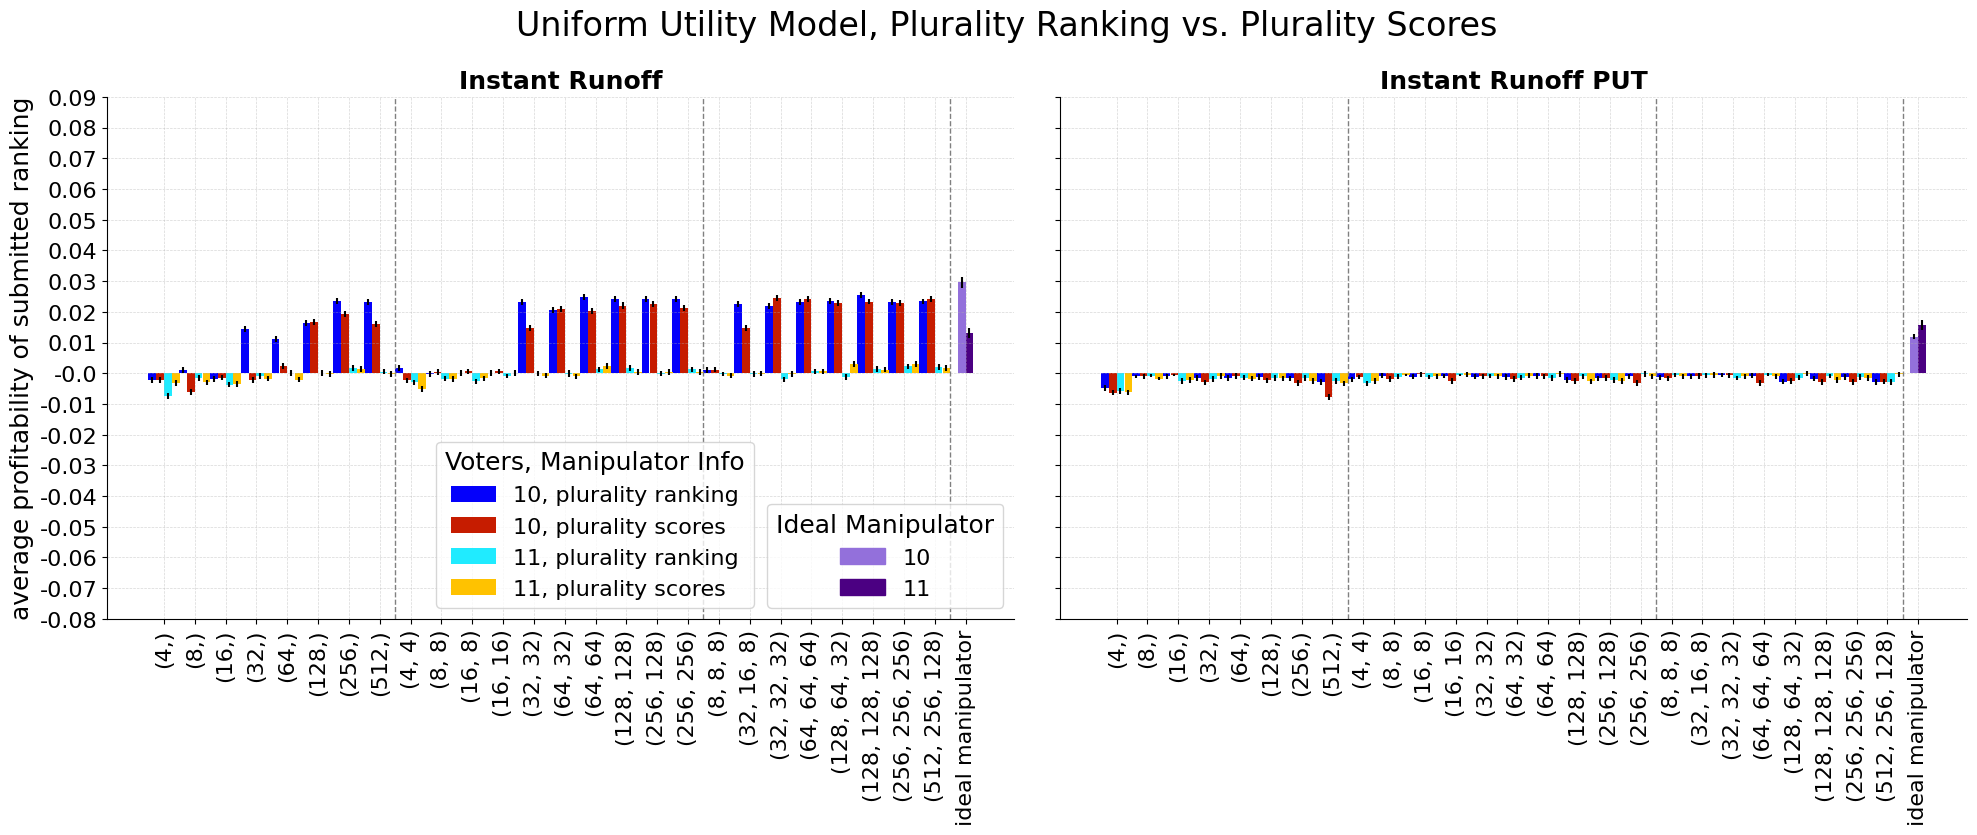

In [135]:
if VISUALIZE_RESULTS:
    voting_method1 = 'Instant Runoff'
    voting_method2 = 'Instant Runoff PUT'
    
    filename = f"./{graphs_dir}/{probmodel}_{voting_method1}_vs_{voting_method2}.pdf"
    agent_infos = [agent_infos1]
    df_agent_infos1 = pd.read_csv(f"evaluation_csv/{probmodel}/df_avg_{num_cands}_{agent_infos}_{manip_weight}_{gen}.csv")

    agent_infos = [agent_infos2]
    df_agent_infos2 = pd.read_csv(f"evaluation_csv/{probmodel}/df_avg_{num_cands}_{agent_infos}_{manip_weight}_{gen}.csv")

    df_agent_infos1['agent_infos'] = agent_infos1
    df_agent_infos2['agent_infos'] = agent_infos2

    # Combining both dataframes again
    combined_df_new = pd.concat([df_agent_infos1, df_agent_infos2], ignore_index=True)

    # Creating the 'voters_info' column which combines the number of voters and agent_infos
    combined_df_new['voters_info'] = combined_df_new['num_voters'].astype(str) + ', ' + combined_df_new['agent_infos']

    color_dict = {
            f"{num_voters1}, {agent_infos1}": num_voters1_colors[agent_infos1],
            f"{num_voters2}, {agent_infos1}": num_voters2_colors[agent_infos1],
            f"{num_voters1}, {agent_infos2}": num_voters1_colors[agent_infos2],
            f"{num_voters2}, {agent_infos2}": num_voters2_colors[agent_infos2],
        }

    if group_by_num_voters:
        legend_label_mapping = {
                f"{num_voters1}, {agent_infos1}": f"{num_voters1}, {agent_infos1_str}",
                f"{num_voters1}, {agent_infos2}": f"{num_voters1}, {agent_infos2_str}",

                f"{num_voters2}, {agent_infos1}": f"{num_voters2}, {agent_infos1_str}",
                f"{num_voters2}, {agent_infos2}": f"{num_voters2}, {agent_infos2_str}"
            }
        
    else: 
        legend_label_mapping = {
                f"{num_voters1}, {agent_infos1}": f"{num_voters1}, {agent_infos1_str}",
                f"{num_voters2}, {agent_infos1}": f"{num_voters2}, {agent_infos1_str}",
                f"{num_voters1}, {agent_infos2}": f"{num_voters1}, {agent_infos2_str}",
                f"{num_voters2}, {agent_infos2}": f"{num_voters2}, {agent_infos2_str}"
            }



    ideal_manip_df = pd.read_csv(f'ideal_manipulator_data/{probmodel}/combined_ideal_manipulator_data.csv')

    ideal_manipulators_df = ideal_manip_df[ideal_manip_df['num_voters'].isin([num_voters1, num_voters2])]
    # Now calling the modified function with the provided arguments
    

    # Now calling the modified function with the provided arguments
    generate_graphs_with_errorbars_two_vms(combined_df_new, ideal_manipulators_df[ideal_manipulators_df["num_cands"] == num_cands], num_cands, manip_weight, legend_label_mapping, color_dict, filename, voting_method1, voting_method2, labeling=labeling, probmodel=probmodel, gen=gen, additional_title_str=additional_title_str)


# Supplementary Figures D.1-D.3: Graphs to compare across different numbers of candidates 

In [140]:
if VISUALIZE_RESULTS: 
    gen = 1
    all_num_cands = [3, 4, 5, 6]
    all_num_voters = [5, 6, 10, 11, 20, 21]
    all_num_voters_pairs = [
        '(5, 6)', 
        '(10, 11)', 
        '(20, 21)'
    ] 
    manip_weight = 1
    agent_infos = 'majority'
    agent_infos_str = 'Majority Matrix'
    probmodel = 'uniform'

    labeling = 'optimize'
    decision_rule = 'argmax'
    metric_op = 'normalized_subtract'
    evaluation_batch_size = 4096
    max_est_std_error = 0.0005
    eval_dict = {}
    df = pd.read_csv(f"evaluation_csv/{probmodel}/all_agent_infos_diff_cands.csv")

In [141]:
data_for_df = {
    "num_cands": list(),
    "num_voters": list(),
    "agent_infos": list(),
    "vm": list(),
    "mean_profitability": list(),
    "model_size": list(),
}

for num_cands in all_num_cands: 
    for num_voters in all_num_voters: 
        for vm in voting_methods_order:
            data_for_df["num_cands"].append(num_cands)
            data_for_df["num_voters"].append(num_voters)
            data_for_df["agent_infos"].append(agent_infos)
            data_for_df["vm"].append(vm)
            max_mean_profitability = df[(df['num_cands'] == num_cands) & (df['num_voters'] == num_voters) & (df['agent_infos'] == agent_infos) & (df['vm'] == vm)]['mean_profitability'].max()

            # find the model_size with the max mean_profitability
            model_size = df[(df['num_cands'] == num_cands) & (df['num_voters'] == num_voters) & (df['agent_infos'] == agent_infos) & (df['vm'] == vm) & (df['mean_profitability'] == max_mean_profitability)]['model_size'].values[0]

            data_for_df["mean_profitability"].append(max_mean_profitability)
            data_for_df["model_size"].append(model_size)
   
df_with_max = pd.DataFrame(data_for_df)


In [142]:
if VISUALIZE_RESULTS: 
    fontsize = 14

    ideal_manip_df = pd.read_csv(f'./ideal_manipulator_data/{probmodel}/combined_ideal_manipulator_data.csv')
    # Combining the two dataframes
    combined_df = ideal_manip_df
        
    combined_df['vm'] = combined_df['vm'].replace('Strict Nanson', 'Nanson')
    combined_df['vm'] = combined_df['vm'].replace('Blacks', "Black's")

    # Filtering for 'max' decision_rule
    filtered_max_decision = combined_df[combined_df['decision_rule'] == 'max']
    filtered_max_decision['num_cands_str'] = filtered_max_decision['num_cands'].astype(str)


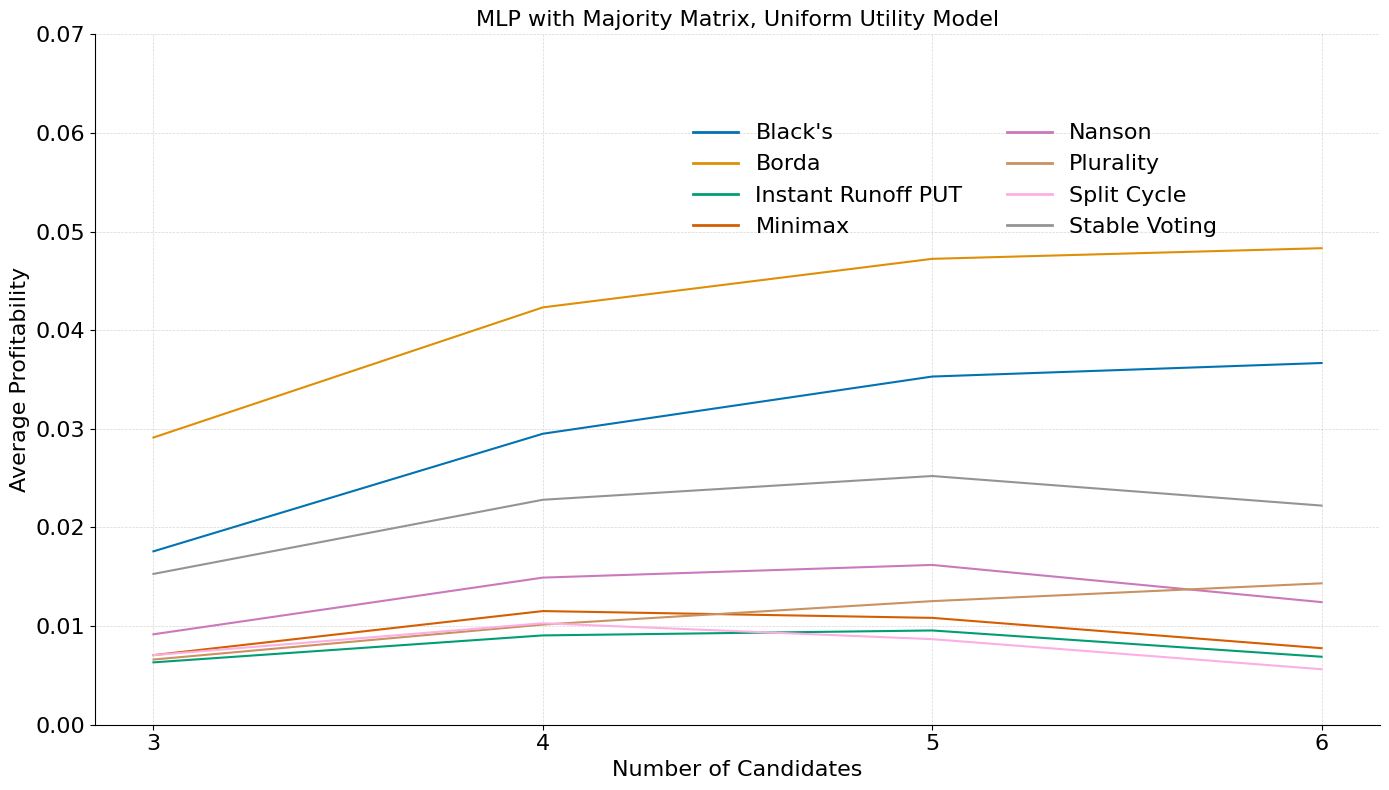

In [143]:

if VISUALIZE_RESULTS:

    # replace Strict Nanson with Nanson
    df_with_max['vm'] = df_with_max['vm'].replace('Strict Nanson', 'Nanson')
    df_with_max['vm'] = df_with_max['vm'].replace('Blacks', "Black's")
    fontsize=16
    df_with_max['num_cands_str'] = df_with_max['num_cands'].astype(str)

    # Extracting unique voting methods and preparing a color palette
    unique_vms = sorted(df_with_max['vm'].unique())
    palette = sns.color_palette("colorblind", n_colors=len(unique_vms))

    # Creating the plot
    plt.figure(figsize=(14, 8))

    # Plotting lines for each voting method and preparing legend elements
    legend_elements = []
    for i, vm in enumerate(unique_vms):

        _data = df_with_max[(df_with_max['vm'] == vm) & (df_with_max['agent_infos'] ==  agent_infos)]
        mean_profit_data = _data.pivot_table(index='num_cands_str', values='mean_profitability', aggfunc='mean')
        plt.plot(mean_profit_data.index, mean_profit_data.values, linestyle='-', color=palette[i])

        legend_elements.append(plt.Line2D([0], [0], color=palette[i], lw=2, label=vm))

    to_probmodel_str = {
        'uniform': 'Uniform Utility Model',
        'mallows': 'Mallows Model',
        'spatial_2dim': 'Spatial 2D Model'
    }

    # Adding plot details
    plt.title(f'MLP with {agent_infos_str}, {to_probmodel_str[probmodel]}', fontsize=fontsize)
    plt.xlabel('Number of Candidates', fontsize=fontsize)
    plt.ylabel('Average Profitability', fontsize=fontsize)

    # Adding the legend with only solid lines for voting methods
    plt.legend(handles=legend_elements, title='', loc='upper left', bbox_to_anchor=(0.45, 0.9), fontsize=fontsize, ncols=2, frameon=False)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    sns.despine(right=True, top=True)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.ylim(0, 0.07)
    plt.tight_layout()
    plt.savefig(f"./{graphs_dir}/{probmodel}_num_cands_different_voting_methods_{agent_infos}.pdf")
    plt.show()


### Ideal manipulator

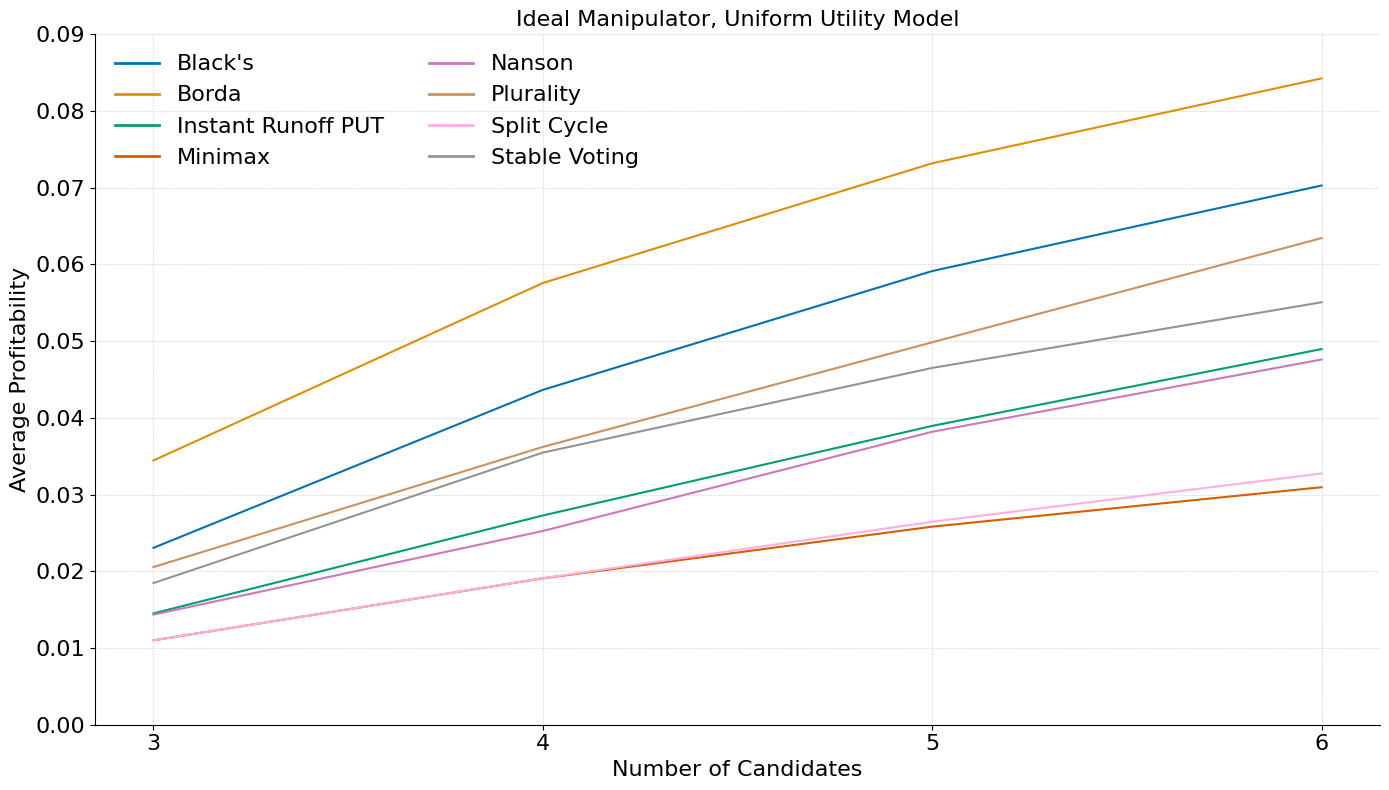

In [145]:
if VISUALIZE_RESULTS:
 
    # replace Strict Nanson with Nanson
    df_with_max['vm'] = df_with_max['vm'].replace('Strict Nanson', 'Nanson')
    df_with_max['vm'] = df_with_max['vm'].replace('Blacks', "Black's")
    
    fontsize=16

    df_with_max['num_cands_str'] = df_with_max['num_cands'].astype(str)

    unique_vms = sorted(df_with_max['vm'].unique())
    palette = sns.color_palette("colorblind", n_colors=len(unique_vms))

    plt.figure(figsize=(14, 8))

    legend_elements = []

    for i, vm in enumerate(unique_vms):

        ideal_data = filtered_max_decision[filtered_max_decision['vm'] == vm]
        ideal_data_avg = ideal_data.pivot_table(index='num_cands_str', values='mean', aggfunc='mean')

        plt.plot(ideal_data_avg.index, ideal_data_avg.values, linestyle='-', color=palette[i])

        legend_elements.append(plt.Line2D([0], [0], color=palette[i], lw=2, label=vm))

    to_probmodel_str = {
        'uniform': 'Uniform Utility Model',
        'mallows': 'Mallows Model',
        'spatial_2dim': 'Spatial 2D Model'
    }

    plt.title(f'Ideal Manipulator, {to_probmodel_str[probmodel]}', fontsize=fontsize)
    plt.xlabel('Number of Candidates', fontsize=fontsize)
    plt.ylabel('Average Profitability', fontsize=fontsize)

    plt.legend(handles=legend_elements, title='', loc='upper left', bbox_to_anchor=(0., 1.0), fontsize=fontsize, ncols=2, frameon=False)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    sns.despine(right=True, top=True)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.ylim(0, 0.09)

    plt.tight_layout()
    plt.savefig(f"./{graphs_dir}/{probmodel}_num_cands_different_voting_methods_ideal.pdf")
    plt.show()


### Ratio of mean profitability to the mean of the best possible profitability for a fixed model size

In [146]:
if VISUALIZE_RESULTS:

    ideal_manip_df = pd.read_csv(f'./ideal_manipulator_data/{probmodel}/combined_ideal_manipulator_data.csv')
    # Combining the two dataframes

    fontsize = 16
    # Combining the two dataframes
    combined_df = ideal_manip_df
        
    combined_df['vm'] = combined_df['vm'].replace('Strict Nanson', 'Nanson')
    combined_df['vm'] = combined_df['vm'].replace('Blacks', "Black's")

    # Filtering for 'max' decision_rule
    filtered_max_decision = combined_df[combined_df['decision_rule'] == 'max']

    df_with_max_ratio = df_with_max.copy()
    df_with_max_ratio['vm'] = df_with_max_ratio['vm'].replace('Strict Nanson', 'Nanson')
    df_with_max_ratio['vm'] = df_with_max_ratio['vm'].replace('Blacks', "Black's")

    data_for_df = {
        'vm': list(), 
        'num_cands': list(),
        "agent_infos": list(),
        "ratio": list(),
    }

    for num_cands in all_num_cands:
        for vm in voting_methods_order:
            if vm == "Strict Nanson": 
                vm = "Nanson"
            if vm == "Blacks": 
                vm = "Black's"
            ideal_voter_mean = filtered_max_decision[(filtered_max_decision["num_cands"] == num_cands) & (filtered_max_decision['vm'] == vm)]['mean'].mean()
            
            # # # get the mean of the current vm for the same number of candidates and voters
            vm_mean = df_with_max_ratio[(df_with_max_ratio["num_cands"] == num_cands) & ((df_with_max_ratio['vm'] == vm) & (df_with_max_ratio['agent_infos'] == agent_infos))]['mean_profitability'].mean()
                                # calculate the ratio
            ratio = vm_mean / ideal_voter_mean
                            # add the ratio to the dataframe
            data_for_df['vm'].append(vm)
            data_for_df['num_cands'].append(num_cands)
            data_for_df['agent_infos'].append(agent_infos)
            data_for_df['ratio'].append(ratio)

    df_with_max_ratio = pd.DataFrame(data_for_df)


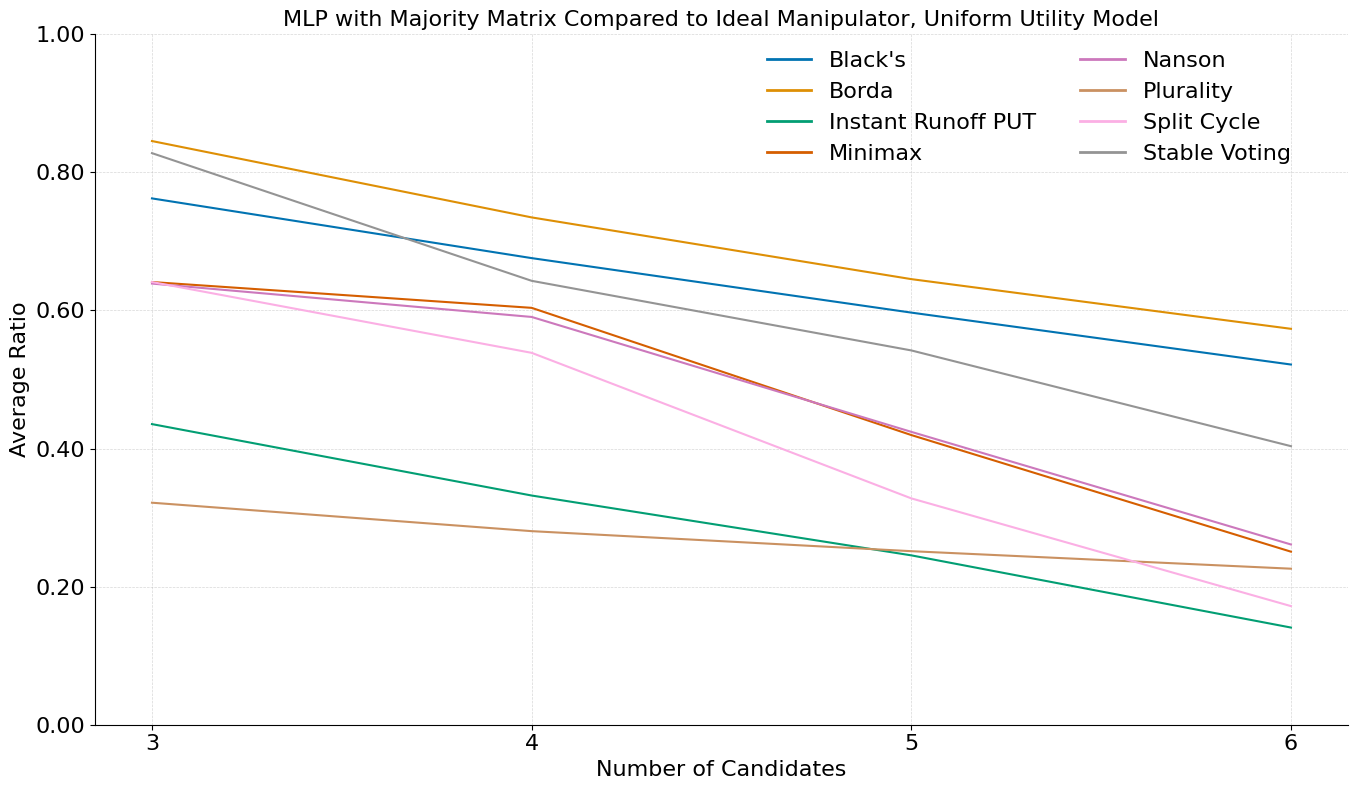

In [147]:
if VISUALIZE_RESULTS:
    
    df_with_max_ratio['num_cands_str'] = df_with_max_ratio['num_cands'].astype(str)

    unique_vms = sorted(df_with_max_ratio['vm'].unique())
    palette = sns.color_palette("colorblind", n_colors=len(unique_vms))

    plt.figure(figsize=(14, 8))

    legend_elements = []
    for i, vm in enumerate(unique_vms):

        _data = df_with_max_ratio[(df_with_max_ratio['vm'] == vm) & (df_with_max_ratio['agent_infos'] == agent_infos)]
        
        ratio_data = _data.pivot_table(index='num_cands_str', values='ratio', aggfunc='mean')

        plt.plot(ratio_data.index, ratio_data.values, linestyle='-', color=palette[i])

        legend_elements.append(plt.Line2D([0], [0], color=palette[i], lw=2, label=vm))

    # Adding plot details
    to_probmodel_str = {
        'uniform': 'Uniform Utility Model',
        'mallows': 'Mallows Model',
        'spatial_2dim': 'Spatial 2D Model'
    }
    plt.title(f'MLP with {agent_infos_str} Compared to Ideal Manipulator, {to_probmodel_str[probmodel]}', fontsize=fontsize)
    plt.xlabel('Number of Candidates', fontsize=fontsize)
    plt.ylabel('Average Ratio', fontsize=fontsize)
    min_ratio = df_with_max_ratio['ratio'].min()
    plt.ylim(min_ratio if min_ratio < 0 else 0.0, 1.0)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    plt.legend(handles=legend_elements, title='', loc='upper left', bbox_to_anchor=(0.52, 1.005), fontsize=fontsize, ncols=2, frameon=False)

    sns.despine(right=True, top=True)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.savefig(f"./{graphs_dir}/{probmodel}_num_cands_different_voting_methods_{agent_infos}_ratio.pdf")
    plt.show()
